# COSC2753 - Assignment 1 - Length of Stay Prediction 

**RMIT University Vietnam**

**Course:** COSC2753

**Name:** Pham Cong Minh

**ID:** s3818102

**Lecturer:** Dr. Duy Dang Pham Thien

**Submission Due Date:** 16 April 2021

## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('dark_background')
pd.set_option('display.max_columns', 70)

## 2. Read train data & inspect

### 2.1 Read data

In [2]:
train_data = pd.read_csv('train_data.csv').drop(['ID', 'HealthServiceArea'], axis=1)

train_data.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


### 2.2 Inspect data

In [3]:
train_data.describe()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405
std,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246
min,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000
25%,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000
50%,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000
75%,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000
max,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        59966 non-null  object
 1   Race                          59966 non-null  object
 2   TypeOfAdmission               59966 non-null  object
 3   CCSProcedureCode              59966 non-null  int64 
 4   APRSeverityOfIllnessCode      59966 non-null  int64 
 5   PaymentTypology               59966 non-null  object
 6   BirthWeight                   59966 non-null  int64 
 7   EmergencyDepartmentIndicator  59966 non-null  object
 8   AverageCostInCounty           59966 non-null  int64 
 9   AverageChargesInCounty        59966 non-null  int64 
 10  AverageCostInFacility         59966 non-null  int64 
 11  AverageChargesInFacility      59966 non-null  int64 
 12  AverageIncomeInZipCode        59966 non-null  int64 
 13  LengthOfStay    

In [5]:
train_data.shape

(59966, 14)

## 3. Data preprocessing and visualization

### 3.1 Convert LoS to binary targets

In [6]:
train_data['LengthOfStay'] = train_data['LengthOfStay'].apply(lambda x: 0 if int(x) <= 3 else 1)
train_data['LengthOfStay'].value_counts()

0    49895
1    10071
Name: LengthOfStay, dtype: int64

### 3.2 Deep inspection to consider anomaly data point(s)

In [7]:
for col in train_data.columns:
    print(col)
    count = train_data[col].value_counts()
    percent = train_data[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
    print(pd.DataFrame({'Counts': count, 'Percent': percent}))
    print('--------------------------------')

Gender
   Counts Percent
M   30978  51.66%
F   28987  48.34%
U       1    0.0%
--------------------------------
Race
                        Counts Percent
White                    32943  54.94%
Other Race               18314  30.54%
Black/African American    8183  13.65%
Multi-racial               526   0.88%
--------------------------------
TypeOfAdmission
           Counts Percent
Newborn     58741  97.96%
Emergency     659    1.1%
Urgent        412   0.69%
Elective      154   0.26%
--------------------------------
CCSProcedureCode
      Counts Percent
 228   19886  33.16%
 115   13628  22.73%
 0     11189  18.66%
 220   10773  17.97%
 231    2981   4.97%
-1       769   1.28%
 216     740   1.23%
--------------------------------
APRSeverityOfIllnessCode
   Counts Percent
1   47953  79.97%
2    8760  14.61%
3    3252   5.42%
4       1    0.0%
--------------------------------
PaymentTypology
                           Counts Percent
Medicaid                    28723   47.9%
Private He

### 3.3 Plot the attributes of class 0 and 1

In [8]:
def Facet_Grid_sns(df):
    for c in df.columns:
        g = sns.FacetGrid(df, col='LengthOfStay',height =4, aspect = 2)
        g.map(plt.hist, str(c) ,bins=20)
        g.set_axis_labels(c, "Count")

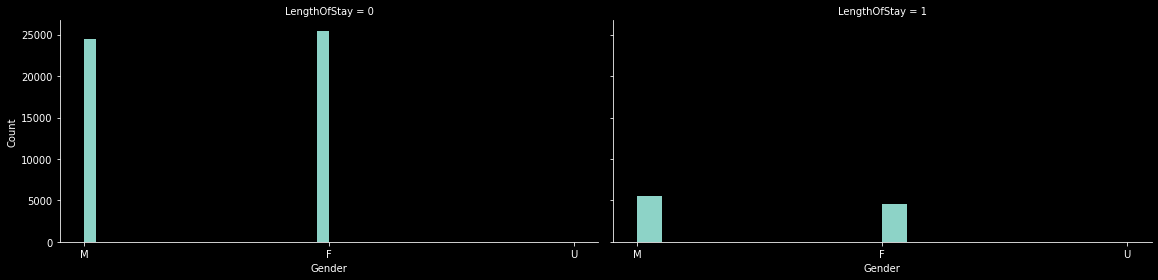

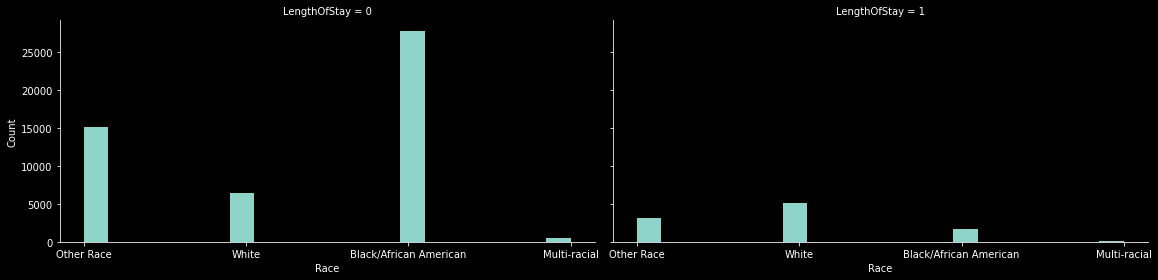

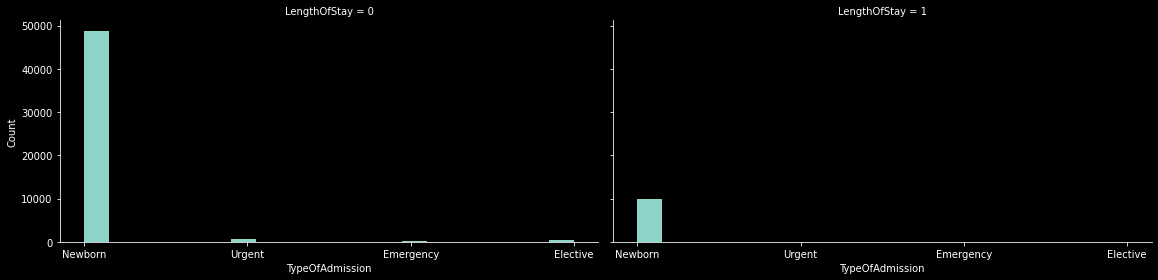

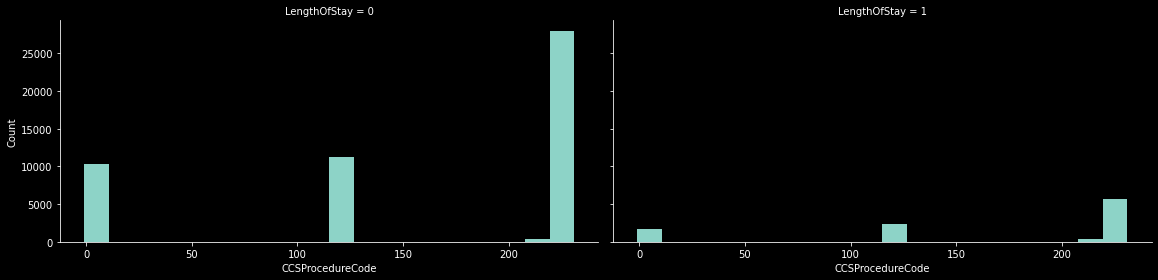

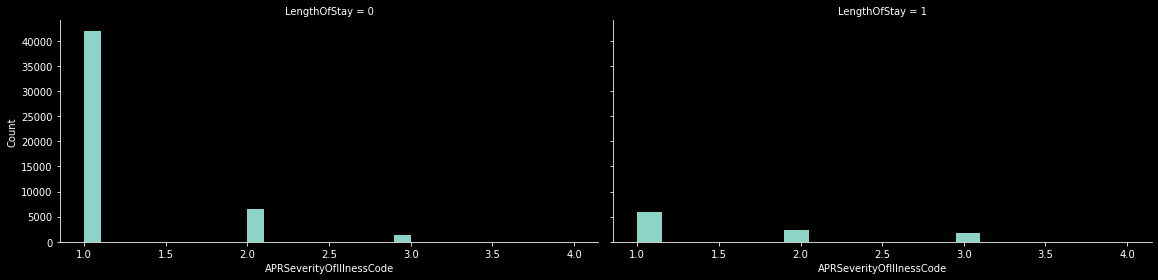

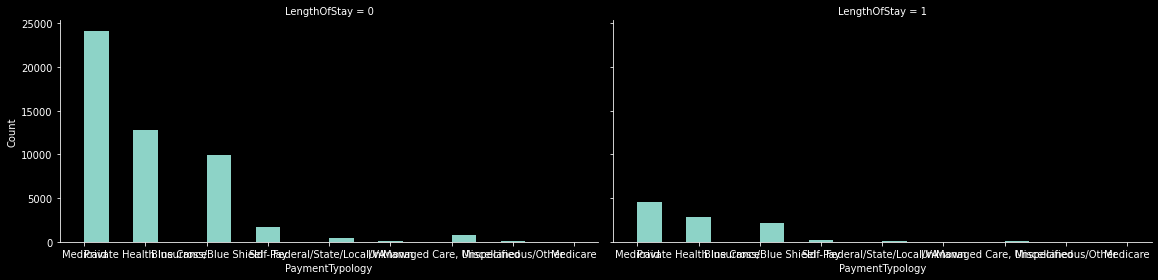

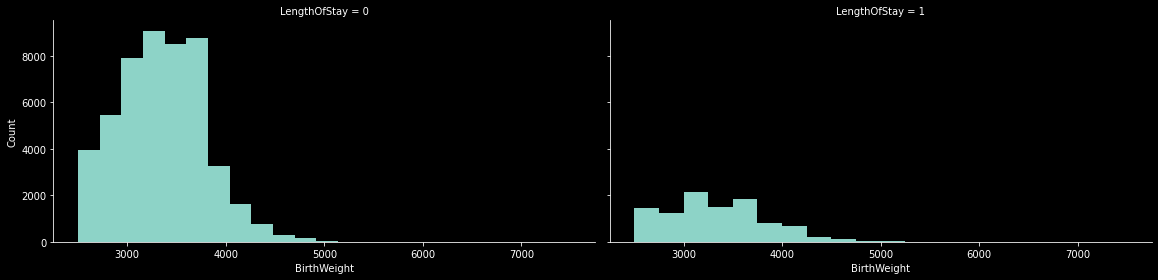

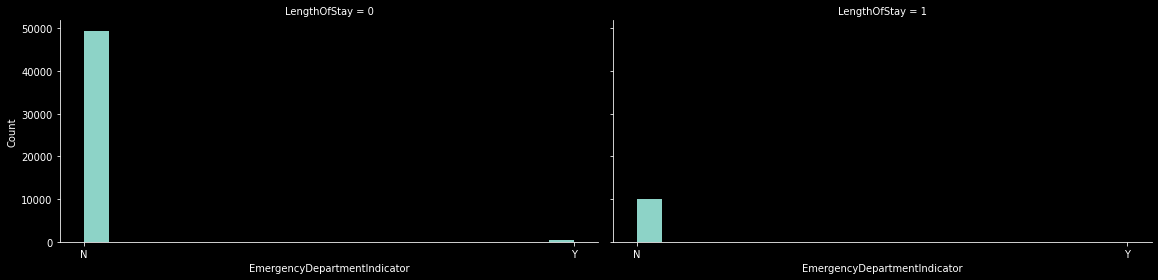

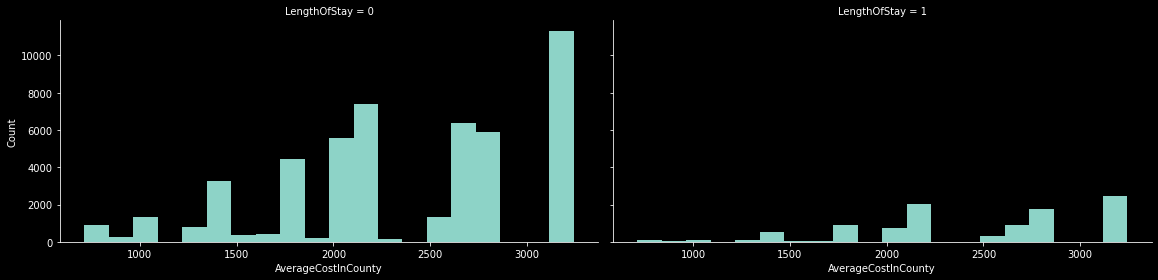

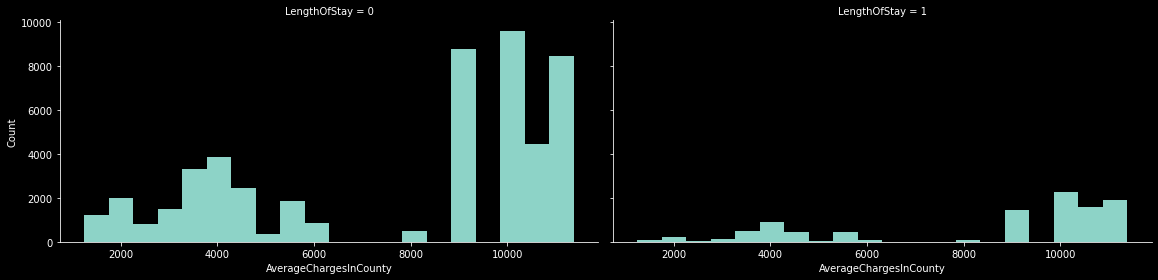

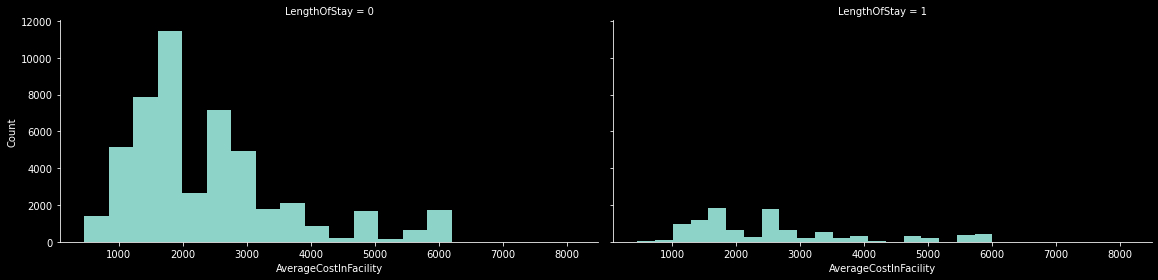

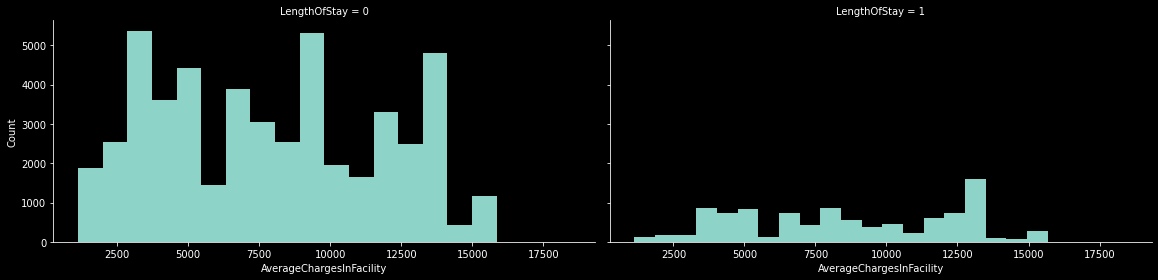

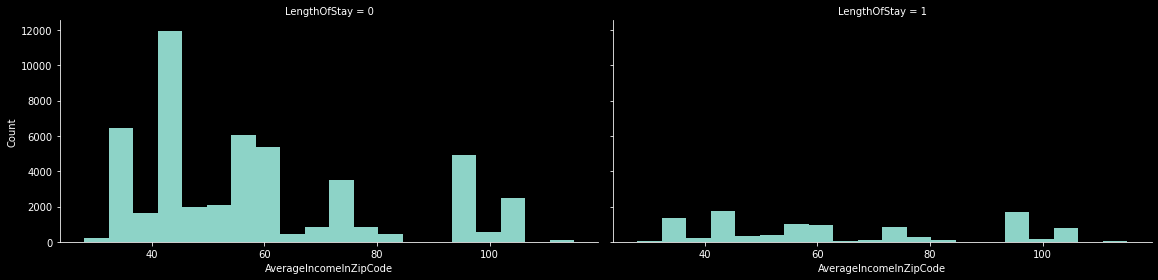

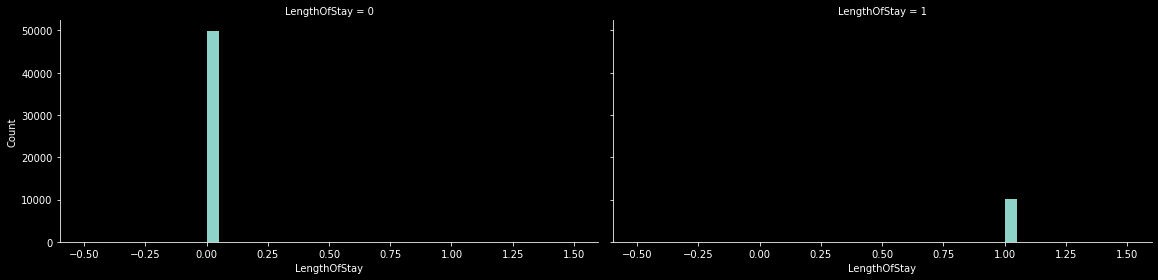

In [9]:
Facet_Grid_sns(train_data)

### 3.2 Split into X and y

In [10]:
X = train_data.drop('LengthOfStay', axis=1)
y = train_data['LengthOfStay']

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


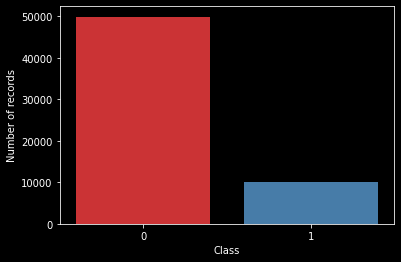

In [11]:
sns.countplot(y, palette='Set1')
plt.xlabel('Class')
plt.ylabel('Number of records')
plt.show()

## 4. Encode norminal data

### 4.1.  Using pd.get_dummies()

In [12]:
X_copy = X.copy()
encode_col = ['Gender', 
              'Race',
              'TypeOfAdmission', 
              'CCSProcedureCode',
              'PaymentTypology']

for col in encode_col:
    dummy = pd.get_dummies(X_copy[col])
    X_copy = pd.concat([X_copy, dummy], axis=1)
    X_copy = X_copy.drop(col, axis=1)

# Check X_copy
X_copy.columns

Index([    'APRSeverityOfIllnessCode',                  'BirthWeight',
       'EmergencyDepartmentIndicator',          'AverageCostInCounty',
             'AverageChargesInCounty',        'AverageCostInFacility',
           'AverageChargesInFacility',       'AverageIncomeInZipCode',
                                  'F',                            'M',
                                  'U',       'Black/African American',
                       'Multi-racial',                   'Other Race',
                              'White',                     'Elective',
                          'Emergency',                      'Newborn',
                             'Urgent',                             -1,
                                    0,                            115,
                                  216,                            220,
                                  228,                            231,
             'Blue Cross/Blue Shield',       'Federal/State/Local/VA',
      

### 4.2. Drop outliner encoded-columns

In [13]:
# Emergency convert 0,1
X_copy['EmergencyDepartmentIndicator'] = X_copy['EmergencyDepartmentIndicator'].apply(lambda x: 1 if x == "Y" else 0)

# Drop encoded-columns
X_copy.drop(columns = ['U'],inplace = True)

### 4.3. Plot heatmap for correlations (encoded data)

<AxesSubplot:>

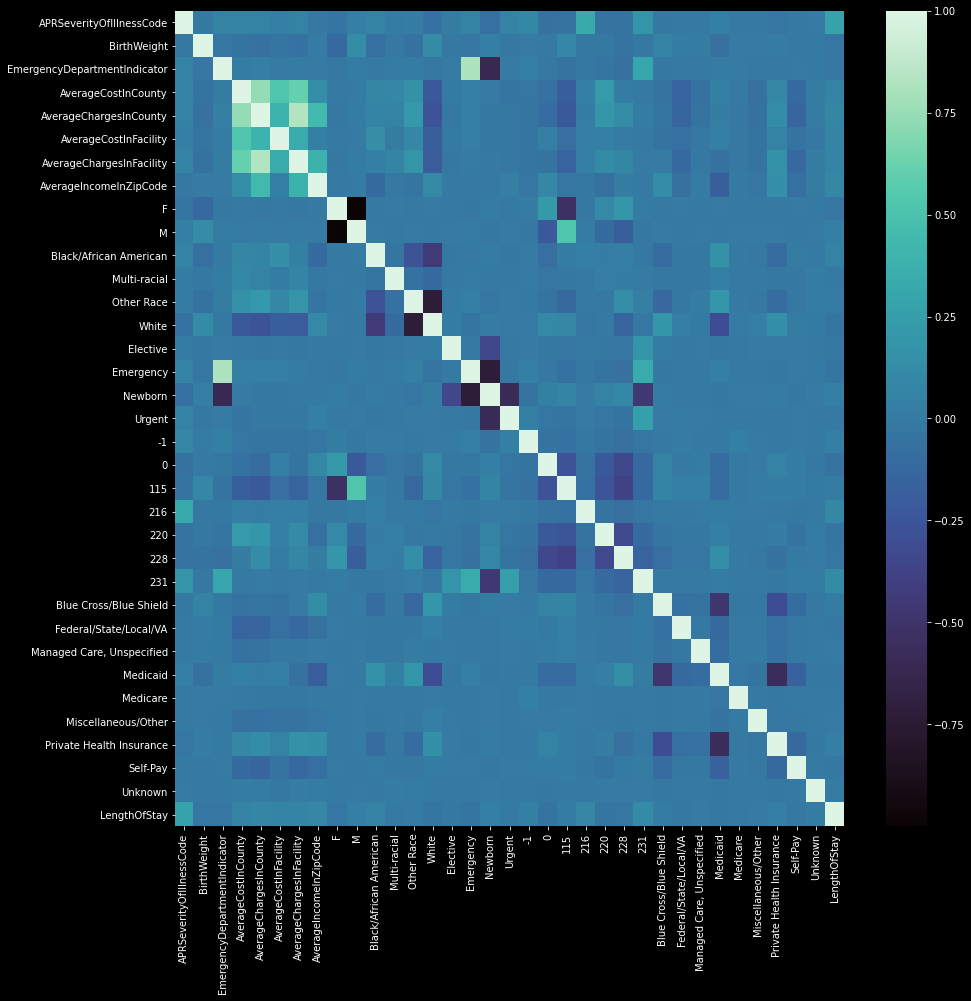

In [14]:
tmp = pd.concat([X_copy, y], axis=1)
correlations = tmp.corr()
fig, ax = plt.subplots(figsize=(15,15)) 

sns.heatmap(correlations, ax = ax, cmap ='mako')

## 5. Split data into training and testing set

### 5.1 Split dataset

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.25, random_state = 2, stratify=y)

In [16]:
X_train

,APRSeverityOfIllnessCode,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,F,M,Black/African American,Multi-racial,Other Race,White,Elective,Emergency,Newborn,Urgent,-1,0,115,216,220,228,231,Blue Cross/Blue Shield,Federal/State/Local/VA,"Managed Care, Unspecified",Medicaid,Medicare,Miscellaneous/Other,Private Health Insurance,Self-Pay,Unknown
30691,3,2600,0,3155,11381,2895,13394,45,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
50762,1,3900,0,2611,9227,3790,6250,45,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
29845,2,2700,0,1860,2846,1860,2846,53,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
21852,1,2600,0,2018,3610,2018,3610,52,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
8701,1,3400,0,2777,1587,2777,1587,54,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11936,1,2600,0,3155,11381,3032,10135,115,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
34101,1,3500,0,1445,3419,1691,3761,36,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
11723,1,3600,0,1826,4190,1459,3505,55,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1274,1,3000,0,3155,11381,3032,10135,84,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


### 5.2 Reset index

In [17]:
def df_reset_index(x):
    return x.reset_index().drop('index', axis = 1)

X_train = df_reset_index(X_train)
X_test = df_reset_index(X_test)
y_train = df_reset_index(y_train)
y_test = df_reset_index(y_test)

In [18]:
X_train

,APRSeverityOfIllnessCode,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,F,M,Black/African American,Multi-racial,Other Race,White,Elective,Emergency,Newborn,Urgent,-1,0,115,216,220,228,231,Blue Cross/Blue Shield,Federal/State/Local/VA,"Managed Care, Unspecified",Medicaid,Medicare,Miscellaneous/Other,Private Health Insurance,Self-Pay,Unknown
0,3,2600,0,3155,11381,2895,13394,45,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,1,3900,0,2611,9227,3790,6250,45,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,2700,0,1860,2846,1860,2846,53,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,1,2600,0,2018,3610,2018,3610,52,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,3400,0,2777,1587,2777,1587,54,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44969,1,2600,0,3155,11381,3032,10135,115,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
44970,1,3500,0,1445,3419,1691,3761,36,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
44971,1,3600,0,1826,4190,1459,3505,55,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
44972,1,3000,0,3155,11381,3032,10135,84,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


## 6. Scale data

### 6.1 StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_transform = scaler.transform(X_train)
X_test_transform = scaler.transform(X_test)
y_train_ravel = y_train.values.ravel()

## 7. Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=0)
logistic.fit(X_train_transform, y_train_ravel)

LogisticRegression(random_state=0)

In [21]:
from sklearn import metrics 

y_pred_logistic = logistic.predict(X_test_transform)

print('Logistic Regression')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_logistic) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_logistic))

Logistic Regression
Accuracy: 84.17%
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     12474
           1       0.61      0.15      0.25      2518

    accuracy                           0.84     14992
   macro avg       0.73      0.57      0.58     14992
weighted avg       0.81      0.84      0.80     14992



## 8. Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train_ravel)

GaussianNB()

In [23]:
y_pred_naive = gnb.predict(X_test)

print('Naive Bayes')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_naive) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_naive))

Naive Bayes
Accuracy: 82.56%
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12474
           1       0.47      0.33      0.39      2518

    accuracy                           0.83     14992
   macro avg       0.67      0.63      0.64     14992
weighted avg       0.80      0.83      0.81     14992



## 9. Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(criterion='entropy', max_depth=None)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [25]:
y_pred_tree = clf.predict(X_test)

print('Decision Tree')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_tree) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_tree))

Decision Tree
Accuracy: 78.84%
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     12474
           1       0.35      0.30      0.32      2518

    accuracy                           0.79     14992
   macro avg       0.61      0.59      0.60     14992
weighted avg       0.78      0.79      0.78     14992



## 10. Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
Rclf = DecisionTreeClassifier(criterion='entropy', max_depth=None)
Rclf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [27]:
y_pred_forest = Rclf.predict(X_test)

print('Random Forest')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_forest) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_forest))

Random Forest
Accuracy: 78.85%
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     12474
           1       0.35      0.29      0.32      2518

    accuracy                           0.79     14992
   macro avg       0.60      0.59      0.60     14992
weighted avg       0.77      0.79      0.78     14992



from sklearn.metrics import accuracy_score
## 11 XGBoost

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [29]:
!pip install xgboost

In [30]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [31]:
y_train

,LengthOfStay
0,0
1,1
2,0
3,0
4,0
...,...
44969,0
44970,0
44971,0
44972,0


In [32]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 4, 5, 6, 8],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ], 
      "objective" : ["binary:logistic"]}

    xgb_model = XGBClassifier()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = make_scorer(f1_score),  
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [33]:
# hyperParameterTuning(X_train,y_train_ravel)

In [51]:
from sklearn.model_selection import StratifiedKFold
kfold=5
skf = StratifiedKFold(n_splits=kfold, random_state=None)

In [35]:
params = {
    'learning_rate' : 0.1,
    'min_child_weight': 5,
    'objective': 'binary:logistic',
    'max_depth': 7,
    'max_delta_step': 1.8,
    'colsample_bytree': 0.4,
    'subsample': 0.8,
    'eta': 0.025,
    'gamma': 0,
    'num_boost_round' : 700
    }

In [36]:
# Define the gini metric
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = gini_normalized(labels, preds)
    return 'gini', gini_score

In [37]:
import xgboost as xgb

In [38]:
y

0        0
1        0
2        0
3        0
4        0
        ..
59961    1
59962    1
59963    1
59964    1
59965    1
Name: LengthOfStay, Length: 59966, dtype: int64

<h2>Apply Test Dataset</h2>

In [39]:
test_data = pd.read_csv("test_data.csv")
submission = pd.DataFrame(columns=['ID','LengthOfStay'])
submission['ID'] = test_data['ID']
test_data = test_data.drop(['ID','HealthServiceArea'], axis = 1)

test_data.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
0,F,Other Race,Newborn,216,3,Medicaid,4900,N,3242,8966,2448,13196,34
1,F,White,Newborn,220,1,Medicaid,3100,N,2611,9227,1751,8951,45
2,M,Multi-racial,Newborn,115,1,Medicaid,3300,N,3155,11381,1052,11314,74
3,M,Other Race,Newborn,228,1,Medicaid,3300,N,2611,9227,3790,6250,45
4,F,Other Race,Newborn,220,2,Medicaid,3800,N,3155,11381,3032,10135,59


In [40]:
for col in test_data.columns:
    print(col)
    count = test_data[col].value_counts()
    percent = test_data[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
    print(pd.DataFrame({'Counts': count, 'Percent': percent}))
    print('--------------------------------')

Gender
   Counts Percent
M   35471  51.28%
F   33704  48.72%
U       2    0.0%
--------------------------------
Race
                        Counts Percent
White                    30432  43.99%
Other Race               27043  39.09%
Black/African American   10780  15.58%
Multi-racial               922   1.33%
--------------------------------
TypeOfAdmission
           Counts Percent
Newborn     68125  98.48%
Emergency     495   0.72%
Urgent        362   0.52%
Elective      194   0.28%
Trauma          1    0.0%
--------------------------------
CCSProcedureCode
      Counts Percent
 228   24212   35.0%
 0     15120  21.86%
 220   13108  18.95%
 115   12819  18.53%
 231    2535   3.66%
 216     764    1.1%
-1       619   0.89%
--------------------------------
APRSeverityOfIllnessCode
   Counts Percent
1   55243  79.86%
2   10935  15.81%
3    2998   4.33%
4       1    0.0%
--------------------------------
PaymentTypology
                           Counts Percent
Medicaid                  

In [41]:
test_copy = test_data.copy()
encode_col = ['Gender', 
              'Race', 
              'TypeOfAdmission', 
              'CCSProcedureCode',
              'PaymentTypology'] 
test_copy['PaymentTypology'] = test_copy['PaymentTypology'].replace(to_replace ="Department of Corrections", value = "Unknown")
test_copy['EmergencyDepartmentIndicator'] = test_copy['EmergencyDepartmentIndicator'].apply(lambda x: 1 if x == "Y" else 0)

for col in encode_col:
    dummy = pd.get_dummies(test_copy[col])
    test_copy = pd.concat([test_copy, dummy], axis=1)
    test_copy = test_copy.drop(col, axis=1)

# Drop encoded-columns           
test_copy.drop(columns = ['U','Trauma'],inplace = True)
              
# Check test_copy
test_copy.columns

Index([    'APRSeverityOfIllnessCode',                  'BirthWeight',
       'EmergencyDepartmentIndicator',          'AverageCostInCounty',
             'AverageChargesInCounty',        'AverageCostInFacility',
           'AverageChargesInFacility',       'AverageIncomeInZipCode',
                                  'F',                            'M',
             'Black/African American',                 'Multi-racial',
                         'Other Race',                        'White',
                           'Elective',                    'Emergency',
                            'Newborn',                       'Urgent',
                                   -1,                              0,
                                  115,                            216,
                                  220,                            228,
                                  231,       'Blue Cross/Blue Shield',
             'Federal/State/Local/VA',    'Managed Care, Unspecified',
      

In [42]:
test_copy

,APRSeverityOfIllnessCode,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,F,M,Black/African American,Multi-racial,Other Race,White,Elective,Emergency,Newborn,Urgent,-1,0,115,216,220,228,231,Blue Cross/Blue Shield,Federal/State/Local/VA,"Managed Care, Unspecified",Medicaid,Medicare,Miscellaneous/Other,Private Health Insurance,Self-Pay,Unknown
0,3,4900,0,3242,8966,2448,13196,34,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,1,3100,0,2611,9227,1751,8951,45,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,1,3300,0,3155,11381,1052,11314,74,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,3300,0,2611,9227,3790,6250,45,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,2,3800,0,3155,11381,3032,10135,59,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69172,1,3500,0,3623,7197,5123,22564,49,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
69173,2,3000,0,3623,7197,5123,22564,115,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
69174,1,3400,0,3623,7197,5123,22564,83,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
69175,1,2900,0,3623,7197,5123,22564,81,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [43]:
X_copy.columns = X_copy.columns.astype(str)

In [44]:
test_copy.columns = test_copy.columns.astype(str)

In [45]:
y_new = pd.DataFrame(y)

In [46]:
submission

,ID,LengthOfStay
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
...,...,...
69172,69173,NaN
69173,69174,NaN
69174,69175,NaN
69175,69176,NaN


In [47]:
sub = pd.DataFrame()
sub['id'] = submission['ID']
sub['LengthOfStay'] = np.zeros_like(submission.ID.values)

In [48]:
sub

,id,LengthOfStay
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
69172,69173,0
69173,69174,0
69174,69175,0
69175,69176,0


In [49]:
X_copy

,APRSeverityOfIllnessCode,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,F,M,Black/African American,Multi-racial,Other Race,White,Elective,Emergency,Newborn,Urgent,-1,0,115,216,220,228,231,Blue Cross/Blue Shield,Federal/State/Local/VA,"Managed Care, Unspecified",Medicaid,Medicare,Miscellaneous/Other,Private Health Insurance,Self-Pay,Unknown
0,1,3700,0,2611,9227,1751,8951,45,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,1,2900,0,3242,8966,3338,6409,34,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,3200,0,3155,11381,4980,9323,45,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,1,3300,0,3155,11381,5826,15680,59,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,2600,0,2611,9227,6000,14344,59,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59961,1,3600,0,1826,4190,1551,3715,36,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
59962,2,3300,0,1826,4190,1551,3715,55,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
59963,2,3400,0,1826,4190,1551,3715,55,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
59964,2,3100,0,1826,4190,1551,3715,55,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [52]:
for i, (train_index, test_index) in enumerate(skf.split(X_copy, y)):
    print('[Fold %d/%d]' % (i + 1, kfold))
    X_train, X_valid = X_copy.iloc[train_index], X_copy.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    # Convert our data into XGBoost format
    d_train = xgb.DMatrix(X_train, y_train)
    d_valid = xgb.DMatrix(X_valid, y_valid)
    d_test = xgb.DMatrix(test_copy)
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]

    # Train the model! We pass in a max of 1,600 rounds (with early stopping after 70)
    # and the custom metric (maximize=True tells xgb that higher metric is better)
    mdl = xgb.train(params, d_train, 1600, watchlist, early_stopping_rounds=70, feval=gini_xgb, maximize=True, verbose_eval=100)

    print('[Fold %d/%d Prediciton:]' % (i + 1, kfold))
    # Predict on our test data
    p_test = mdl.predict(d_test, ntree_limit=mdl.best_ntree_limit)
    sub['LengthOfStay'] += p_test/kfold

[Fold 1/5]
[00:38:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:38:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.64561	train-gini:0.30473	valid-logloss:0.65047	valid-gini:-0.20559


<ipython-input-36-30a765fcc232>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)


[100]	train-logloss:0.34978	train-gini:0.63381	valid-logloss:0.44664	valid-gini:0.28452
[200]	train-logloss:0.33863	train-gini:0.66381	valid-logloss:0.44815	valid-gini:0.30537
[300]	train-logloss:0.32993	train-gini:0.68641	valid-logloss:0.45112	valid-gini:0.30640
[330]	train-logloss:0.32803	train-gini:0.69110	valid-logloss:0.45151	valid-gini:0.30618
[Fold 1/5 Prediciton:]
[Fold 2/5]
[00:38:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:38:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'er

In [53]:
# Change the threshold for filtering gini index (higher may means better!!!)
sub.loc[sub['LengthOfStay'] >= 0.515]

,id,LengthOfStay
101,102,0.539932
154,155,0.521534
172,173,0.586688
401,402,0.550530
793,794,0.574159
...,...,...
68948,68949,0.598952
68959,68960,0.517892
69008,69009,0.590731
69036,69037,0.517775


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


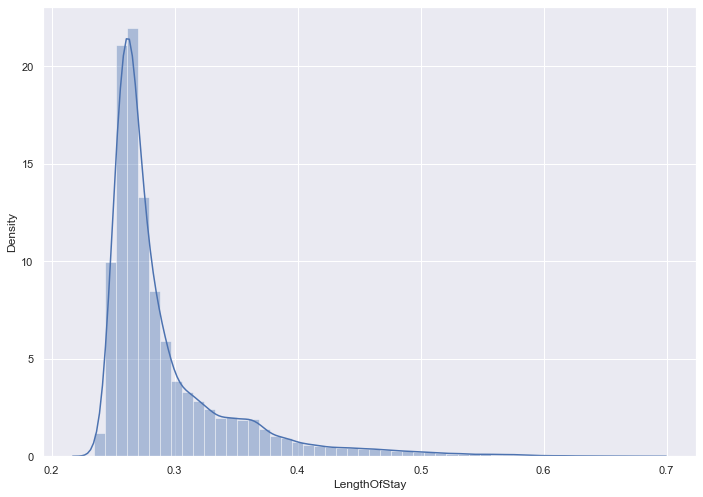

In [54]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.distplot(sub['LengthOfStay'])

In [55]:
sub['LengthOfStay'] = sub['LengthOfStay'].apply(lambda x: 1 if x >= 0.515 else 0)

In [56]:
sub['LengthOfStay'].value_counts()

0    68539
1      638
Name: LengthOfStay, dtype: int64

In [57]:
sub.to_csv('gini515_same_best_xgb.csv', index=False)

In [ ]:
# from xgboost import XGBClassifier

# # xgb = XGBClassifier(learning_rate = 0.05, max_depth = 8, min_child_weight = 3, gamma=  0.2, colsample_bytree =0.4, objective = 'binary:logistic')
# xgb = XGBClassifier(params**)
# # learning_rate = 0.05, max_depth = 8, min_child_weight = 3, gamma=  0.2, colsample_bytree =0.4, objective = 'binary:logistic'
# # learning_rate = 0.1, max_depth = 7, min_child_weight = 5, gamma=  0.0, colsample_bytree =0.4, objective = 'binary:logistic'
# xgb.fit(X_train, y_train)

In [ ]:
# y_xgb = xgb.predict(X_test)

# print('XGBoostClassifier')
# print('Accuracy: {facc}%'.format(facc=round(accuracy_score(y_test, y_xgb) * 100, 2)))
# print(classification_report(y_test, y_xgb))

In [ ]:
# from xgboost import plot_importance

# plot_importance(xgb, max_num_features = 30)
# plt.figure(figsize=(50,50))
# plt.show()

## 12 Apply on Test dataset

In [ ]:
# # test_transform = scaler.transform(test_copy)

# pred_xgb = xgb.predict(test_copy)
# # pred_log = logistic.predict(test_transform)

# pred_xgb

In [ ]:
# u,c = np.unique(pred_xgb, return_counts = True)
# # u1,c1 = np.unique(pred_log, return_counts = True)
# # print(dict(zip(u,c)))
# # print(dict(zip(u1,c1)))
# u,c

In [ ]:
# submission['LengthOfStay'] = pd.Series(pred_xgb)

# submission.to_csv('test_xgb_3.csv',index=False)